<a href="https://colab.research.google.com/github/jcdevaney/imc2023/blob/main/week4/echo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

#import audio files
!git clone https://github.com/jcdevaney/imc2023.git

Cloning into 'imc2023'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 86 (delta 36), reused 15 (delta 1), pack-reused 0
Unpacking objects: 100% (86/86), 5.83 MiB | 3.29 MiB/s, done.


In [2]:
def plotAudio2(sig,sampleRate,title):
    
    # this version expects the audio file to have already been opened by librosa
    
    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Plot the signal using the x and y axis variables    
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [3]:
def makeEchoes(sig,sr,sec,echoes):

    #calculate the number of bytes which corresponds to the offset in milliseconds
    offset=int(sr*sec)
    
    #add extra space at the end for the delays
    ending = np.zeros((offset*(len(echoes))))
    
    delayedSig = np.concatenate((sig,ending))
    
    for i in range(len(echoes)):
        
        #create some silence
        # python indexes starting with zero which is why you need to add one
        beginning = np.zeros(offset*(i+1))
        
        #create delayed version of signal
        delay = np.concatenate((beginning,sig))
        delay = delay * echoes[i]

        #pad the end of delay with zeros to make it the same length as delaysedSig
        delay = np.concatenate((delay,np.zeros((delayedSig.size-delay.size))))
        
        # combine with output signal
        delayedSig = delayedSig + delay
    
    return delayedSig

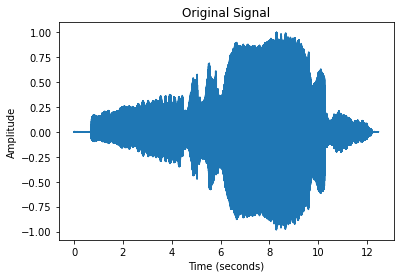

In [4]:
# load original signal
sig , sr = librosa.load('imc2023/audioFiles/avm.wav')
plotAudio2(sig,sr,'Original Signal')
IPython.display.Audio(data=sig, rate=sr)

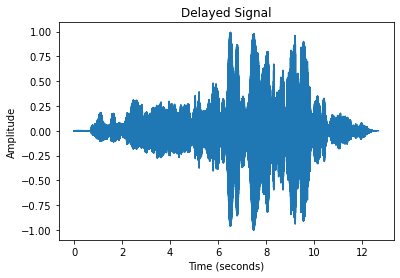

In [5]:
#set the same amplitude for each delay
echoes = [1,1,1,1]
echoSig = makeEchoes(sig,sr,0.050,echoes)
plotAudio2(echoSig,sr,'Delayed Signal')
IPython.display.Audio(data=echoSig, rate=sr)

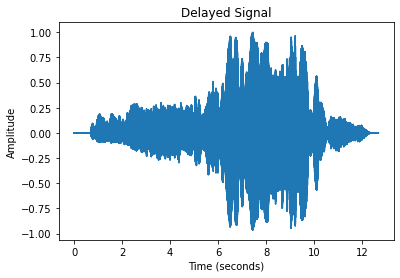

In [7]:
#set the decreasing amplitudes for each delay
echoes2 = [1,0.5,0.25,0.125]
echoSig2 = makeEchoes(sig,sr,0.050,echoes2)
plotAudio2(echoSig2,sr,'Delayed Signal')
IPython.display.Audio(data=echoSig2, rate=sr)